In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform, norm

- $\begin{cases} H_0: \text{null hypothesis} \\ H_a: \text{alternative hypothesis} \end{cases} \rightarrow \text{所有可能}$  
  對立假說通常是我們所希望或需要採取行動的事件  
  $\because 拒絕H_0導致我們可以說H_a是對的$
  
|$H_0$|拒絕|接受|
|---|---|---|
|真實|Type One Error ($\alpha$)|correct|
|錯誤|correct (1-$\beta$)$\leftarrow$檢定力|Type Two Error ($\beta$)|

$\begin{cases} \alpha: 顯著水準 \\ 1-\alpha:信心水準 \end{cases}$

In [2]:
def draw_normal_dis(*, mean=0, std=1, upperbound=10, lowerbound=-10):
    x = np.linspace(lowerbound, upperbound, 100)
    y = norm.pdf(x, loc=mean, scale=std)
    plt.plot(x, y)

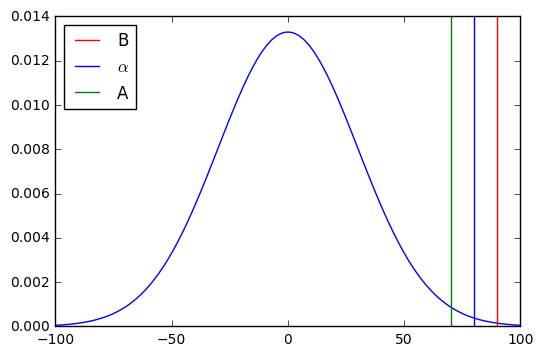

In [3]:
draw_normal_dis(mean=0, std=30, upperbound=100, lowerbound=-100)
plt.axvline(x=90, label='B', color='r')
plt.axvline(x=80, label=r'$\alpha$', color='b')
plt.axvline(x=70, label='A', color='g')
plt.legend(loc=2);

上圖的情況，我們應該要拒絕A ($\because 較 \alpha不精準$)，而不能拒絕B

$\sigma \quad known: \quad z = \frac{\bar{x}- \mu_o}{\frac{\sigma}{\sqrt{n}}}$  
$\sigma \quad unknown: \quad t = \frac{\bar{x}- \mu_o}{\frac{S}{\sqrt{n}}}$  
(雙尾: $\alpha \rightarrow \frac{\alpha}{2}$)
  
  
  
  
proportion: $z = \frac{\bar{P} - P_0}{\sqrt{\frac{P_0(1-P_0)}{n}}}$

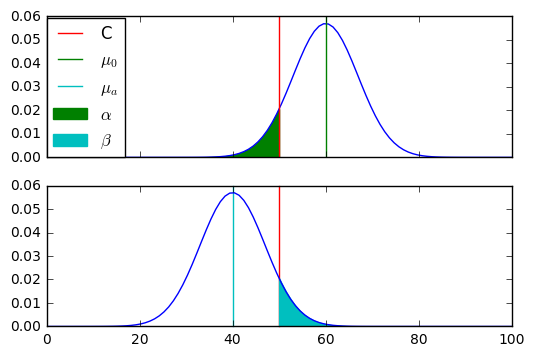

In [4]:
lowerbound, upperbound, size = 0, 100, 100
mu_0, C, mu_a = 60, 50, 40
std = 7

x1 = np.linspace(lowerbound, upperbound, size)
y1 = norm.pdf(x1, loc=mu_0, scale=std)
x1_left = np.linspace(lowerbound, C, size)
y1_left = norm.pdf(x1_left, loc=mu_0, scale=std)

x2 = np.linspace(lowerbound, upperbound, size)
y2 = norm.pdf(x2, loc=mu_a, scale=std)
x2_right = np.linspace(C, upperbound, size)
y2_right = norm.pdf(x2_right, loc=mu_a, scale=std)

f, axarr = plt.subplots(2, sharex=True)

axarr[0].plot(x1, y1)
line_c = axarr[0].axvline(x=C, label='C', color='r')
line_mu_0 = axarr[0].axvline(x=mu_0, label=r'$\mu_0$', color='g')
area_alpha = axarr[0].fill_between(x1_left, y1_left, label=r'$\alpha$', color='g')

axarr[1].plot(x2, y2)
axarr[1].axvline(x=50, label='C', color='r', zorder=0, clip_on=False)
line_mu_a = axarr[1].axvline(x=40, label=r'$\mu_a$', color='c', zorder=0, clip_on=False)
area_beta = axarr[1].fill_between(x2_right, y2_right, color='c')


plt.legend((line_c, line_mu_0, line_mu_a, area_alpha, area_beta),
           ('C', r'$\mu_0$', r'$\mu_a$', r'$\alpha$', r'$\beta$'),
           loc=(0, 1.2));

當上圖的$\mu_a越接近\mu_o，\beta會越大$  
$
C = \mu_0 - Z_\alpha \frac{\sigma}{\sqrt{n}} = \mu_a + Z_\beta \frac{\sigma}{\sqrt{n}} \\
n = \frac{(Z_\alpha + Z_\beta)^2 \sigma^2}{(\mu_0-\mu_a)^2}
$  
  
 
(雙尾: $\alpha \rightarrow \frac{\alpha}{2}$)

- 其他條件固定時，$\alpha下降 \Rightarrow \beta上升$